In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'NSL_regular_season_data_2.csv')
print(data_path)
data = pd.read_csv(data_path)
data.head()

%matplotlib inline

/workspaces/Wharton-HS-Competition-Soccer-Playoff-Predictions/data/NSL_regular_season_data_2.csv


In [2]:
team_data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'data', 'NSL_Metadata.csv'))
team_data.head()

,name,city,state,Team_ID,conference,timezone_UTC,Unnamed: 6
0,Albuquerque Scorpions FC,Albuquerque,New Mexico,ALB,Western,-6,NaN
1,Anchorage Avalanche FC,Anchorage,Alaska,ANC,Western,-8,NaN
2,Augusta Arrows FC,Augusta,Georgia,AUG,Eastern,-4,NaN
3,Bakersfield Bandits FC,Bakersfield,California,BAK,Western,-7,NaN
4,Boise Thunderhawks FC,Boise,Idaho,BOI,Western,-6,NaN


In [3]:
# Create a new column called 'Winner' that contains 1 if the home team wins, 0 if the away team wins, and 0.5 if it's a draw
data['Winner'] = np.where(data['HomeScore'] > data['AwayScore'], 1, np.where(data['HomeScore'] < data['AwayScore'], 0, 0.5))

# Make an elo system for the various teams.
elo = {team: 800 for team in team_data['Team_ID']}
elo_over_time = {team: [elo[team]] for team in team_data['Team_ID']}

# Go through each game that the team has played and update their elo
predicted_winner = []
for index, row in data.iterrows():
    team = row['HomeTeam']
    is_win = row['Winner']
    
    # Calculate the expected score
    q_a = 10 ** (elo[row['HomeTeam']] / 400)
    q_b = 10 ** (elo[row['AwayTeam']] / 400)
    e_a = q_a / (q_a + q_b)
    e_b = q_b / (q_a + q_b)

    # Predict the outcome based on the elo
    print(e_a, e_b, e_a > e_b, is_win, '\n')
    predicted_winner.append(int(e_a > e_b))

    # Update the elo
    k = 60
    elo[team] = elo[team] + k * (is_win - e_a)
    elo[row['AwayTeam']] = elo[row['AwayTeam']] + k * ((1 - is_win) - e_b)

    # Add the new elo to the elo over time dictionary
    for team in team_data['Team_ID']:
        elo_over_time[team].append(elo[team])

# Add the predicted winner to the dataframe
data['PredictedWinner'] = predicted_winner

# Create a new dataframe with the elo scores
elo_df = pd.DataFrame(elo.items(), columns=['Team_ID', 'Elo'])

# Sort the dataframe by elo
elo_df = elo_df.sort_values(by='Elo', ascending=False)
elo_df



0.5 0.5 False 0.0 

0.45693350797778803 0.5430664920222119 False 1.0 

0.5037185912823795 0.4962814087176204 True 0.0 

0.46030779562143387 0.5396922043785661 False 1.0 

0.506824447464166 0.493175552535834 True 0.0 

0.4631291819406099 0.5368708180593901 False 1.0 

0.509418169364232 0.490581830635768 True 1.0 

0.5515952117204669 0.44840478827953306 True 0.5 

0.5471836225102229 0.452816377489777 True 0.0 

0.5000768031959391 0.499923196804061 True 0.0 

0.45700315970028355 0.5429968402997165 False 0.5 

0.46069063742930844 0.5393093625706916 False 0.5 

0.4640656505559282 0.5359343494440718 False 0.5 

0.4671537829339893 0.5328462170660107 False 1.0 

0.5131130441762292 0.48688695582377073 True 1.0 

0.5549345933323104 0.44506540666768957 True 1.0 

0.592509466878603 0.4074905331213971 True 0.5 

0.4151511727074224 0.5848488272925777 False 0.5 

0.5109358552180855 0.4890641447819145 True 1.0 

0.506670108708665 0.4933298912913351 True 1.0 

0.5456080830727523 0.45439191692724773 Tru

0.6800814989479063 0.31991850105209363 True 0.5 

0.6060348268248487 0.3939651731751513 True 0.5 

0.5555597237111428 0.44444027628885713 True 0.0 

0.5176220947231953 0.4823779052768048 True 0.0 

0.47170167465434454 0.5282983253456555 False 0.0 

0.5312117211630717 0.4687882788369283 True 1.0 

0.4316978586364141 0.5683021413635858 False 1.0 

0.5973475968782587 0.4026524031217412 True 0.0 

0.6612595313351496 0.33874046866485047 True 1.0 

0.5989467041670158 0.40105329583298416 True 0.5 

0.5706332314314595 0.4293667685685405 True 1.0 

0.6992264127848664 0.3007735872151336 True 0.5 

0.48699660189959254 0.5130033981004074 False 0.0 

0.3835000700335448 0.6164999299664552 False 1.0 

0.539303628008711 0.46069637199128893 True 0.5 

0.595857060737492 0.40414293926250805 True 0.0 

0.5072130464996669 0.492786953500333 True 0.0 

0.6031337571271973 0.39686624287280264 True 1.0 

0.6332422501821608 0.36675774981783915 True 0.5 

0.48522195289057746 0.5147780471094227 False 0.0 

0.63366

,Team_ID,Elo
2,AUG,996.466221
1,ANC,933.194492
17,OAK,903.334229
18,PRO,897.804547
11,JAC,891.389005
9,FAR,890.626703
14,LRO,886.129729
12,LAR,872.523620
21,SFS,834.149547
19,REN,816.279649


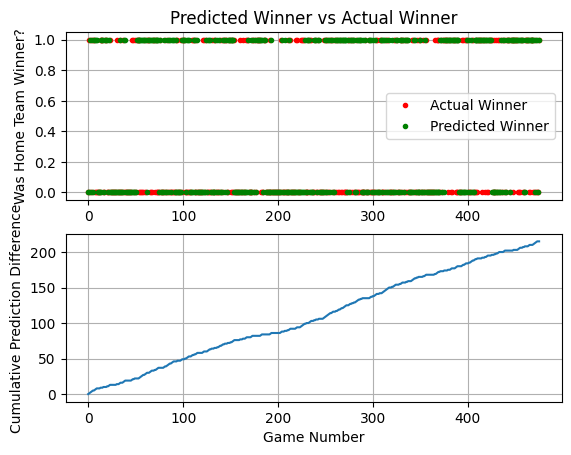

In [4]:
# Treat draws as losses
data['Winner'] = np.where(data['Winner'] == 0.5, 0, data['Winner'])

# Plot the predicted winner vs the actual winner
plt.subplot(2, 1, 1)
plt.plot(data['Winner'], 'r.')
plt.plot(data['PredictedWinner'], 'g.')
plt.ylabel('Was Home Team Winner?')
plt.title('Predicted Winner vs Actual Winner')
plt.legend(['Actual Winner', 'Predicted Winner'], loc='center right')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(np.cumsum(np.abs(data['PredictedWinner'] - data['Winner'])))
plt.xlabel('Game Number')
plt.ylabel('Cumulative Prediction Difference')
plt.grid()

In [5]:
# Test the accuracy of the predicted elo system
accuracy = np.mean(data['Winner'] == data['PredictedWinner'])
print(f'Accuracy of the elo system: {accuracy}')

Accuracy of the elo system: 0.5483193277310925


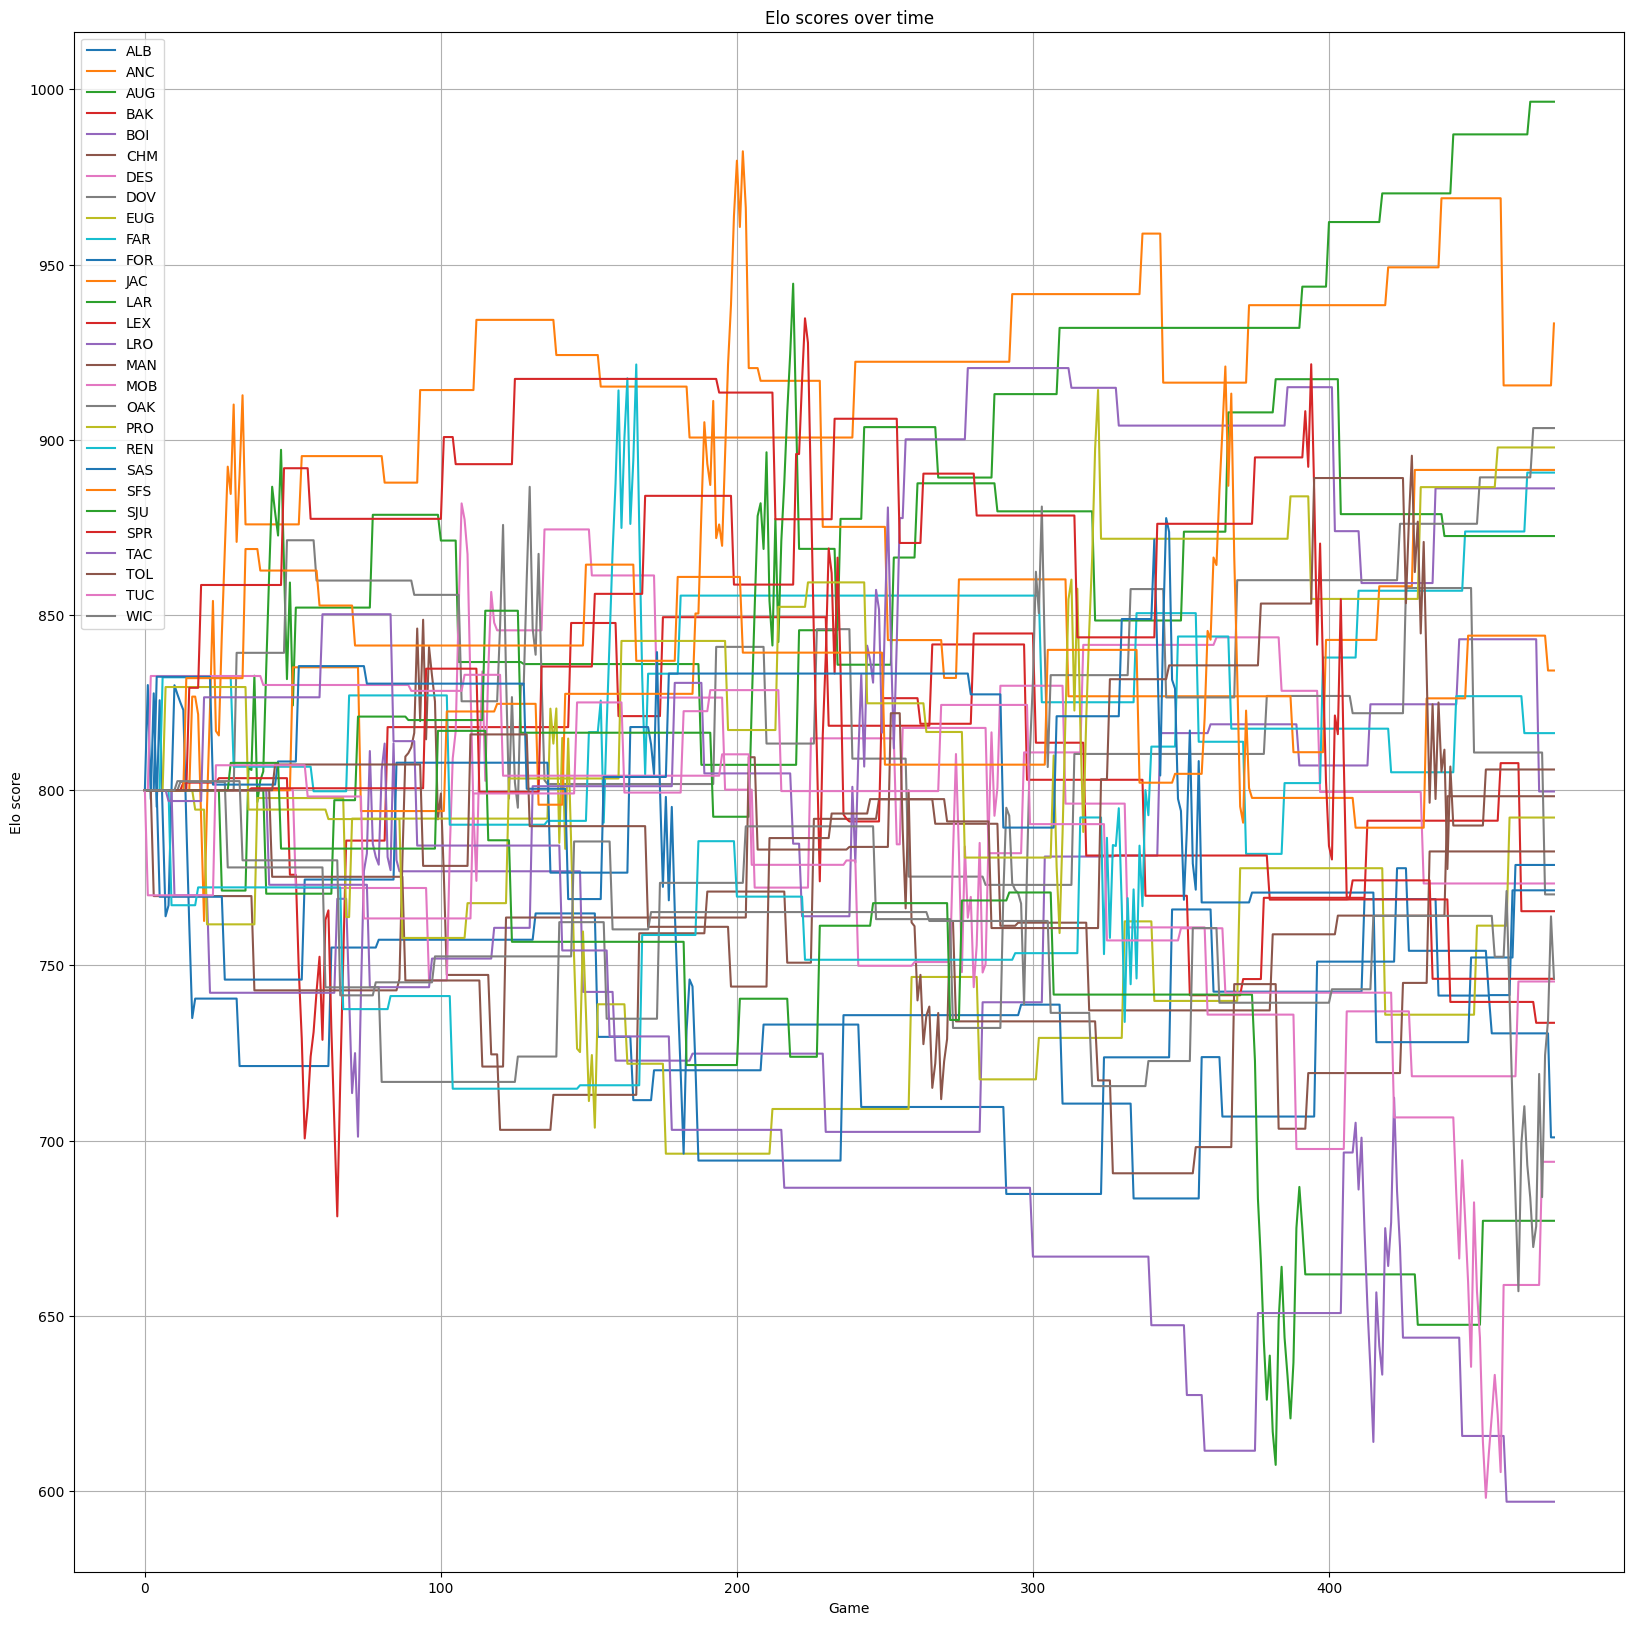

In [6]:
# Plot the elo scores over time
plt.figure(figsize=(20, 20))
for team in team_data['Team_ID']:
    plt.plot(elo_over_time[team], label=team)
plt.legend(loc='upper left')
plt.title('Elo scores over time')
plt.xlabel('Game')
plt.ylabel('Elo score')
plt.grid()